In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import normalize

from sklearn import tree
from sklearn import linear_model
from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import sys,os
import seaborn as sns

%matplotlib inline

In [2]:
training_data = pd.read_csv("C:\Users\ANUHYA\Desktop\CERT_PROJECT_EDUREKA\HR_Data.csv")
training_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
training_data.shape

(14999, 10)

In [4]:
training_data.rename(columns={'sales':'department'}, inplace=True)

In [5]:
training_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
value=[1]
training_data[training_data.satisfaction_level.isin(value)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2023,1.0,0.41,4,174,3,0,0,0,technical,low
2101,1.0,0.74,3,220,4,0,0,0,technical,low
2111,1.0,0.92,5,161,3,1,0,0,support,low
2163,1.0,0.49,3,185,2,0,0,0,sales,low
2193,1.0,0.66,4,180,3,0,0,0,technical,low
2295,1.0,0.86,4,161,2,0,0,0,marketing,high
2321,1.0,0.65,4,202,4,1,0,0,hr,low
2491,1.0,0.94,4,144,3,0,0,0,support,low
3016,1.0,0.81,5,178,2,0,0,0,technical,low
3155,1.0,0.89,3,194,3,0,0,0,sales,medium


In [7]:
print (training_data['left'] == 1).sum()

3571


In [8]:
training_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
training_data = training_data.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'avgMonthlyHrs',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        })
training_data.describe()


,satisfaction,evaluation,projectCount,avgMonthlyHrs,yearsAtCompany,workAccident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


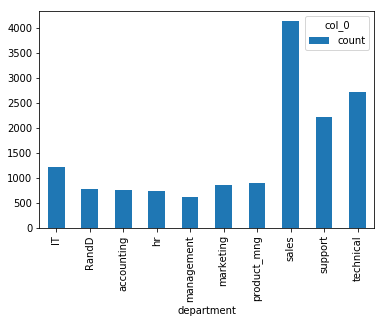

In [11]:
tab = pd.crosstab(index = training_data["department"],columns="count")      

tab.plot.bar()

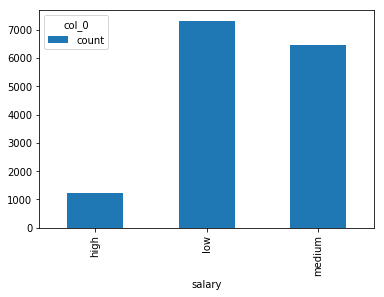

In [12]:
tab = pd.crosstab(index = training_data["salary"],columns="count")
tab.plot.bar()

In [13]:
not_left_pop_satisfaction = training_data['satisfaction'][training_data['left'] == 0].mean()
left_satisfaction = training_data[training_data['left']==1]['satisfaction'].mean()

print( 'The mean satisfaction for employees that have not left is: ' + str(not_left_pop_satisfaction))
print( 'The mean satisfaction for employees that have left is: ' + str(left_satisfaction) )

The mean satisfaction for employees that have not left is: 0.66680959048
The mean satisfaction for employees that have left is: 0.440098011761


In [14]:
import scipy.stats as stats
stats.ttest_1samp(a=training_data[training_data['left']==1]['satisfaction'],popmean = not_left_pop_satisfaction) 
#Sample of Employee satisfaction who left 
# Employee Who Have not left satisfaction mean

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

In [15]:
dof = len(training_data[training_data['left']==1])

RightQ = stats.t.ppf(0.975,dof)
LeftQ = stats.t.ppf(0.025,dof)

print('The right quartile range of this t-distribution is: ' + str(RightQ))
print('The left quartile range of this t-distribution is: ' + str(LeftQ))

The right quartile range of this t-distribution is: 1.9606285216
The left quartile range of this t-distribution is: -1.9606285216


In [16]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['department', 'salary']
    data_combined = pd.concat([df_train[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
data_train = encode_features(training_data)
data_train.head()

,satisfaction,evaluation,projectCount,avgMonthlyHrs,yearsAtCompany,workAccident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [17]:
data_train.department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1], dtype=int64)

In [18]:
data_train.salary.unique()

array([1, 2, 0], dtype=int64)

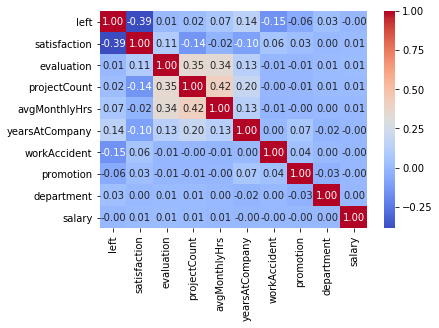

In [19]:
t = sns.heatmap(data_train[["left","satisfaction","evaluation","projectCount","avgMonthlyHrs","yearsAtCompany","workAccident","promotion","department","salary"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

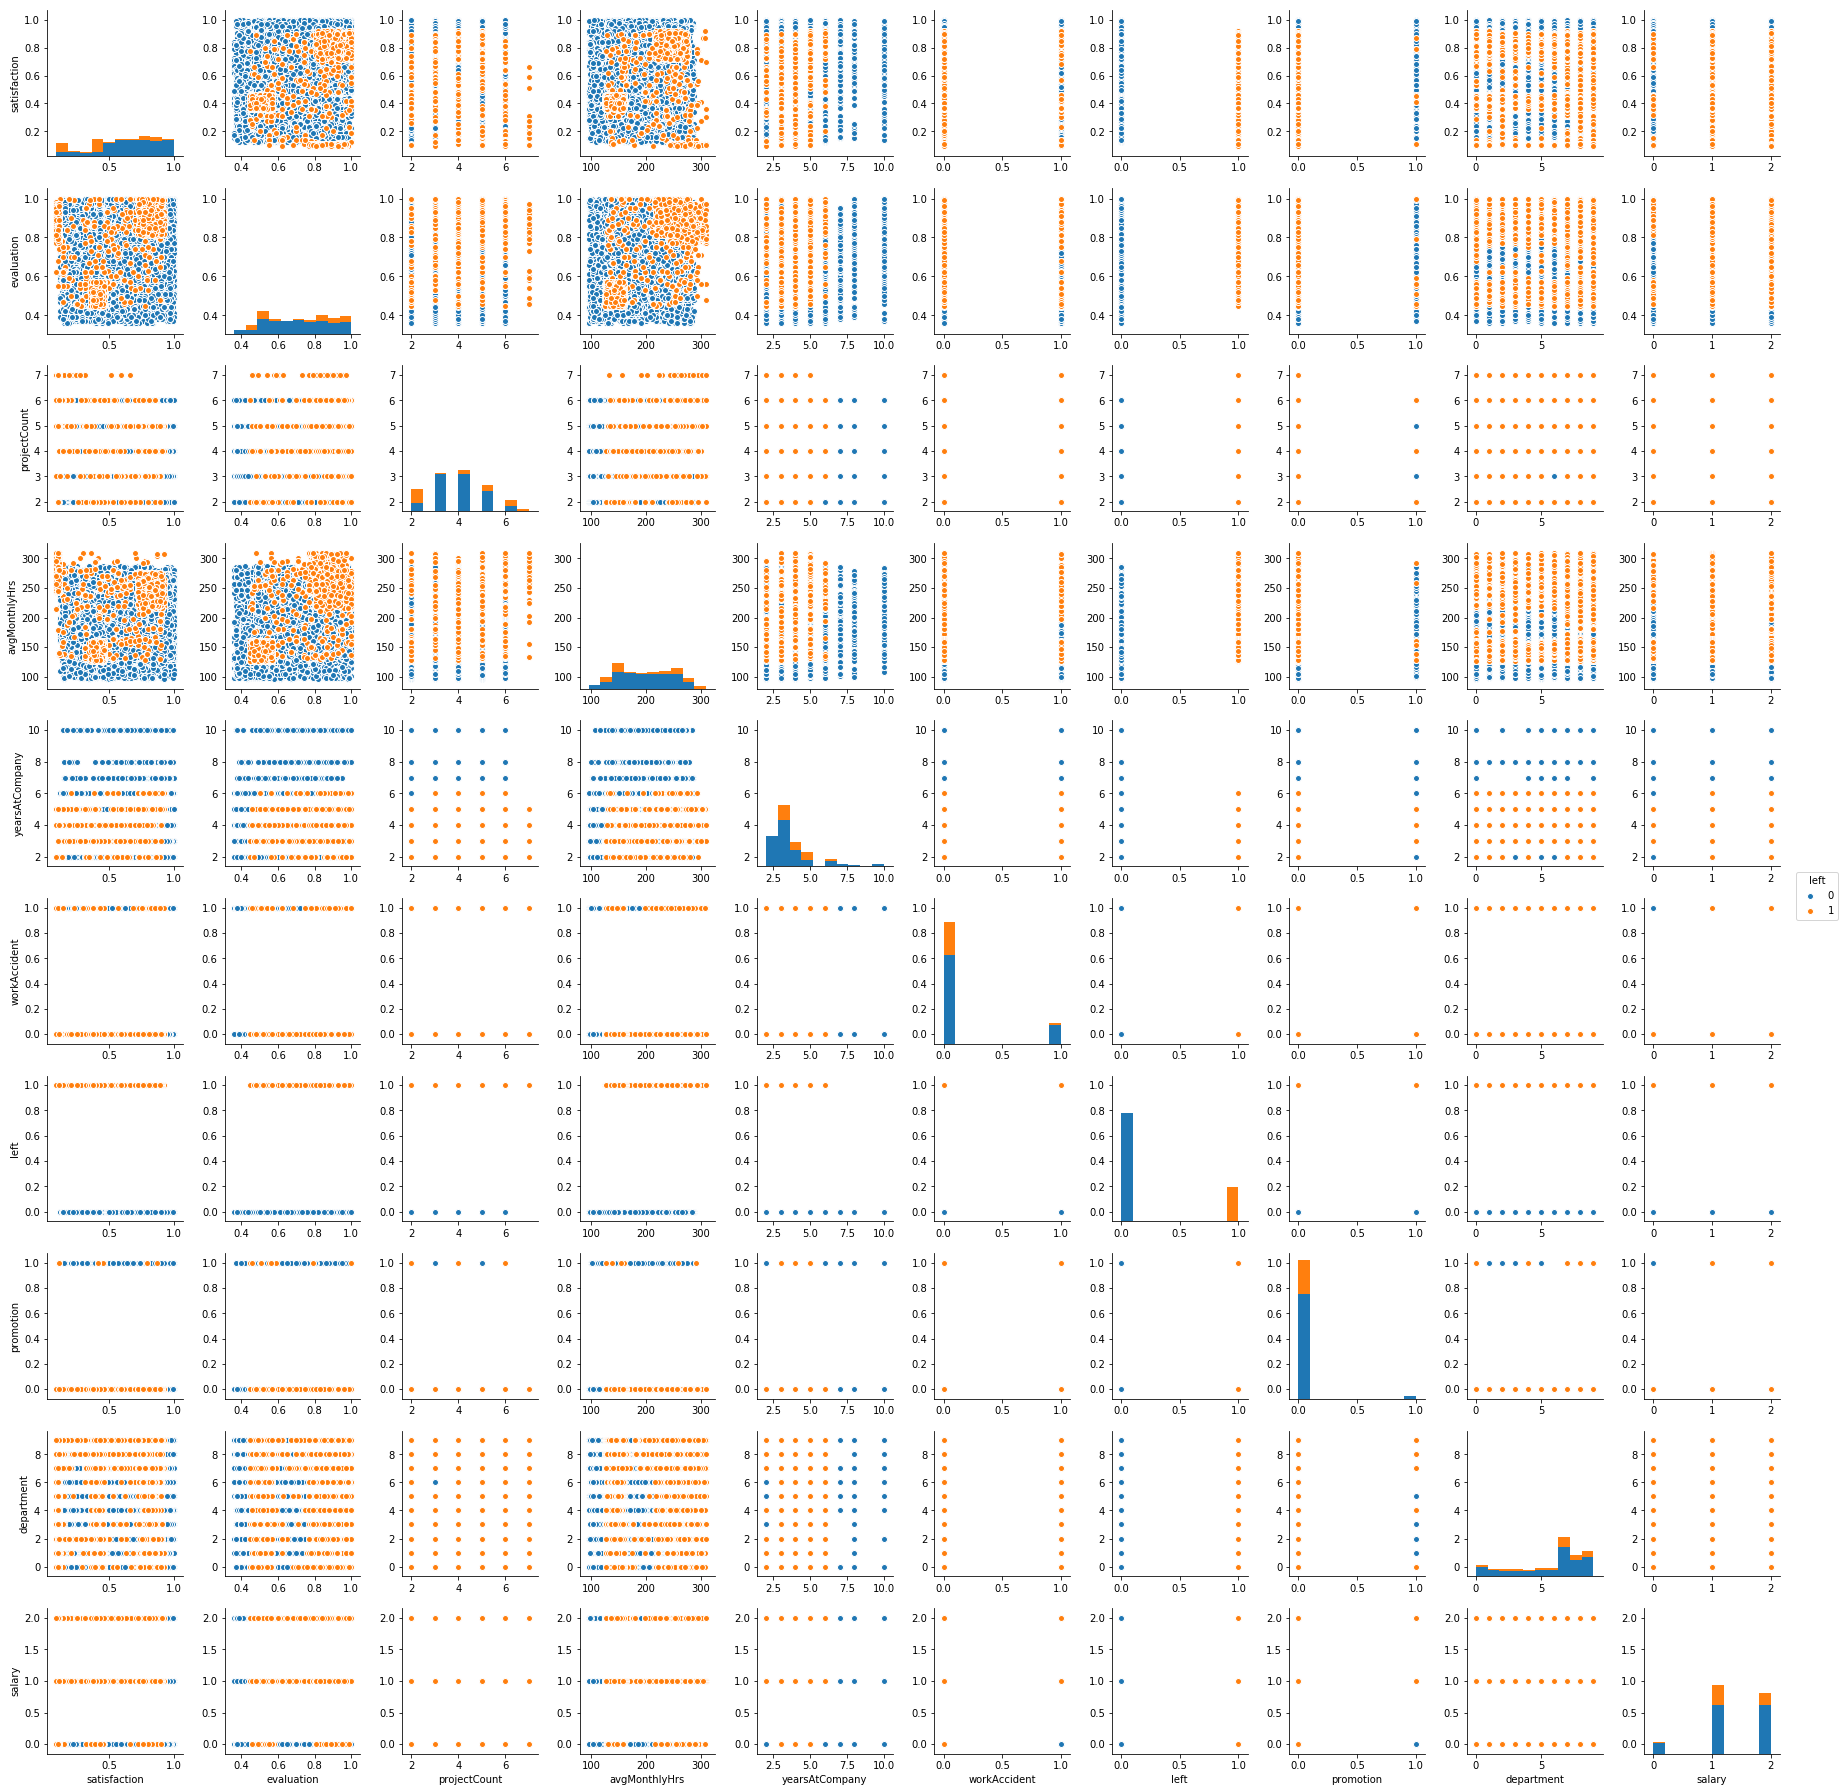

In [20]:
sns.pairplot(data_train,hue='left')